In [1]:
import pickle
import numpy as np

import sys
sys.path.append('..')
import ctmc

import matplotlib.pyplot as plt
%matplotlib inline

## Load Demo Dataset
A preprocessed data list is used.

In [2]:
with open("../data/example.pkl", "rb") as f:
    datalist = pickle.load(f)
numstates = 9

## Correct Data Errors

In [3]:
newlist = ctmc.datacorrection(datalist, toltime=1e-8)

## Fit

In [4]:
model = ctmc.Ctmc(numstates, transintv=1.0, toltime=1e-8, debug=False)
model = model.fit(newlist)

In [5]:
model.transmat.round(2)

array([[0.96, 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.04, 0.9 , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.03, 0.89, 0.08, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.06, 0.86, 0.06, 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.11, 0.8 , 0.08, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.1 , 0.79, 0.05, 0.01, 0.04],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.21, 0.53, 0.17, 0.07],
       [0.  , 0.  , 0.  , 0.  , 0.03, 0.38, 0.06, 0.52, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

## Predict

In [6]:
s0 = np.zeros(shape=(numstates,))
s0[0] = 1

In [7]:
out = model.predict(s0)
out

array([9.59042201e-01, 3.96720153e-02, 1.24751277e-03, 3.75024034e-05,
       7.05714400e-07, 6.12327701e-08, 8.50006366e-10, 4.32672048e-11,
       4.85809264e-10])

In [8]:
#sum(out)

## Multi-Step Simulation

In [9]:
out = model.predict(s0, steps=500)
out[:10].round(2)

array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.92, 0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.89, 0.1 , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.86, 0.13, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.83, 0.15, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.8 , 0.17, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.77, 0.18, 0.04, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.75, 0.2 , 0.04, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.73, 0.21, 0.05, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ]])

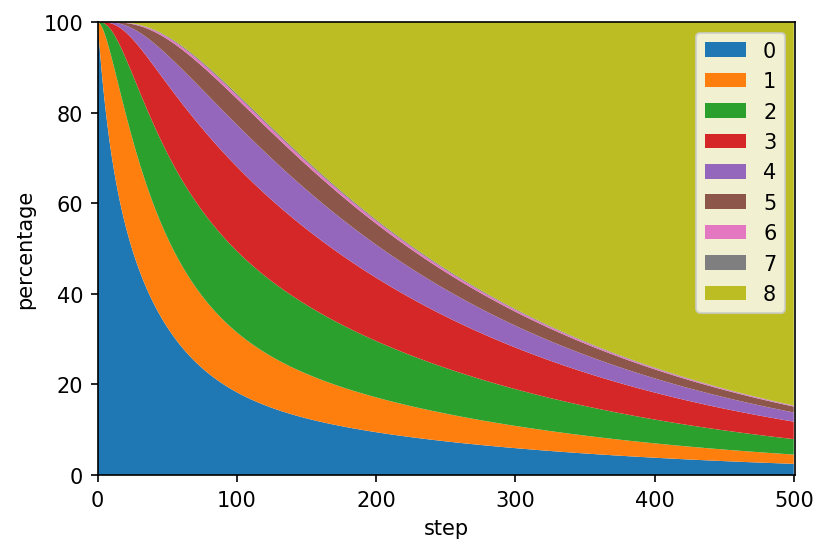

In [10]:
fig, ax = plt.subplots(dpi=150, facecolor='white')
ax.stackplot(list(range(len(out))), out.T * 100, labels=list(range(numstates)));
ax.legend(loc='upper right');
ax.set_xlabel('step');
ax.set_ylabel('percentage');
ax.set_xlim(0, len(out));
ax.set_ylim(0, 100);